# Modelo de Regresión Lineal
----




# Stats Models
----

In [2]:
# Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip


# No límite en columnas o filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Guerry.csv'
df = pd.read_csv(url)

##  Modelo 
---

In [3]:
# Minimos Cuadrados
model = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=df)
results = model.fit()

##  Análisis de Residuos
----

Hacemos residuos vs Fitted values, no debería haber patron.

Text(0.5, 1.0, 'Residuos vs Predicciones')

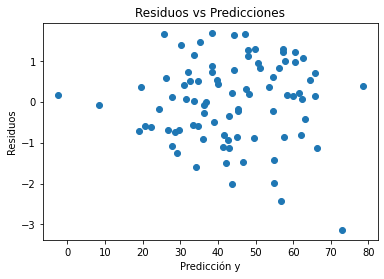

In [31]:
from statsmodels.stats.outliers_influence import OLSInfluence

residuos_estandar = OLSInfluence(results).resid_studentized

residuos = residuos_estandar
predichos = results.predict()

plt.scatter(predichos, residuos);
plt.xlabel("Predicción y")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones")

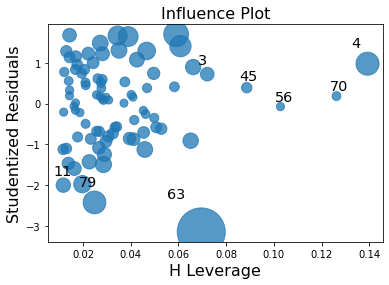

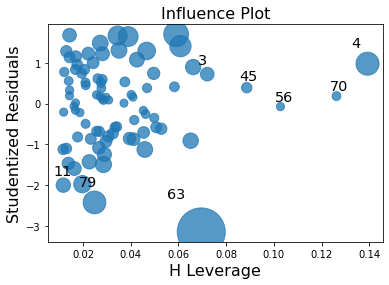

In [67]:
influence = OLSInfluence(results)
influence.plot_influence()

In [62]:
n = model.nobs
p = results.df_model + 1

media_leverage= p/n
media_leverage

0.03488372093023256

### Multicolinearidad
---

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(model.exog, u ) for u in range(int(p))]

[256.6103473033632, 1.0028404674117044, 1.0028404674117044]

##  Test de Heterocedasticidad
---

Hipótesis Nula: es Homocedástico

Breusch-Pagan Test

$$û² = δ₀ + δ₁X₁ + … δkXk+ v$$
White Test
$$û² = δ₀ + δ₁X₁+ … + δkXk + δ(k+₁)x₁² + δ(k+₂)X₁X₂ + … + v$$

In [36]:
white_test = sms.diagnostic.het_white(results.resid,  model.exog )

In [52]:
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
lzip(labels, white_test)

[('LM Statistic', 8.484940824652044),
 ('LM-Test p-value', 0.13145740771023354),
 ('F-Statistic', 1.751389402765341),
 ('F-Test p-value', 0.13248065708030998)]

## Test de Normalidad
----

In [50]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)


[('Jarque-Bera', 3.393608024843164),
 ('Chi^2 two-tail prob.', 0.18326831231663396),
 ('Skew', -0.4865803431122335),
 ('Kurtosis', 3.003417757881633)]

0.9781386782513115

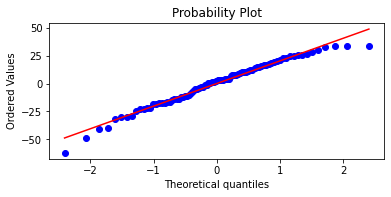

In [64]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(results.resid, plot=ax, fit=True)
r**2

In [69]:
print(test_class.summary_table())

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0     41.000     45.281      0.000     -0.211      0.012     -0.023     -0.210     -0.023
         1     38.000     26.107      0.003      0.591      0.028      0.100      0.589      0.100
         2     66.000     61.667      0.001      0.217      0.040      0.044      0.216      0.044
         3     80.000     65.846      0.013      0.720      0.072      0.201      0.718      0.200
         4     79.000     60.507      0.052      0.977      0.139      0.393      0.977      0.393
         5     70.000     50.654      0.005      0.957      0.018      0.128      0.956      0.128
         6     31.000     36.185      0.001     -0.260      0.046     -0.057     -0.259     -0.057
         7

## Variables Binarias
---

MARSTAT Marital status of the survey respondent (=1 if married,
=2 if living with partner, and =0 otherwise)

In [ ]:
term_c["MARSTAT"].value_counts()

In [ ]:
results_b = smf.ols('LNFACE ~ LNINCOME +  C(MARSTAT)', data=term_c).fit()

print(results_b.summary())

###  Elemento de Interacción
---

In [ ]:
results_b = smf.ols('LNFACE ~ LNINCOME +  C(MARSTAT) + LNINCOME:C(MARSTAT)', data=term_c).fit()

print(results_b.summary())

## Polinomios
---

In [ ]:
def cuadrado(x):
    return x**2

In [ ]:
results_b = smf.ols('LNFACE ~ LNINCOME + cuadrado(LNINCOME)', data=term_c).fit()

print(results_b.summary())

## Tabla Anova
----

In [ ]:
table = sm.stats.anova_lm(results, typ=2)

print(table)